In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

df = pd.read_csv('ATC_data_20241022.csv')
df.head()

,Molecule Name,SMILES,Collections,A. stephenis hand-to-cage repellent testing: Experiment number,A. stephenis hand-to-cage repellent testing: Duration of recording (Min.),A. stephenis hand-to-cage repellent testing: Concentration (µg/cm2),A. stephenis hand-to-cage repellent testing: Evaporation time (Min.),A. stephenis hand-to-cage repellent testing: Compound volume (ml),A. stephenis hand-to-cage repellent testing: Surface (cm2),A. stephenis hand-to-cage repellent testing: Material,A. stephenis hand-to-cage repellent testing: Volunteer,A. stephenis hand-to-cage repellent testing: Volunteer alias,A. stephenis hand-to-cage repellent testing: Test Date,A. stephenis hand-to-cage repellent testing: Repellency (%),A. stephenis hand-to-cage repellent testing: Average repellency (%),A. stephenis hand-to-cage repellent testing: Average repellency (%) Standard Deviation (±),A. stephenis hand-to-cage repellent testing: Average repellency (%) Count,A. stephenis hand-to-cage repellent testing: Concentration percentage (%)
0,TQ-0044235,CCOC(=O)CCNCCc1ccccc1,"Expansion set 4, Tested on Culex",22JKON095,130.0,NaN,5.0,1.0,37.5,Cheese cloth,Jessica,D,25-12-1900,25.00,39.20,20.000,2,NaN
1,TQ-0044235,CCOC(=O)CCNCCc1ccccc1,"Expansion set 4, Tested on Culex",22JKON095,130.0,NaN,5.0,1.0,37.5,Cheese cloth,Jessica,D,25-12-1900,53.30,39.20,20.000,2,NaN
2,TQ-0044232,CC(C)(C)OC(=O)N1CCC(C(C)(C)N)CC1,"Expansion set 4, Tested on Culex",22JKON095,130.0,NaN,5.0,1.0,37.5,Cheese cloth,Jessica,D,25-12-1900,10.30,9.93,0.581,2,NaN
3,TQ-0044232,CC(C)(C)OC(=O)N1CCC(C(C)(C)N)CC1,"Expansion set 4, Tested on Culex",22JKON095,130.0,NaN,5.0,1.0,37.5,Cheese cloth,Jessica,D,25-12-1900,9.52,9.93,0.581,2,NaN
4,TQ-0044230,CC(=O)C1CCN(C(=O)OC(C)(C)C)C1,"Expansion set 4, Tested on Culex",22RHEN061,5.0,130.0,360.0,1.0,37.5,Cheese cloth,Rob,B,22-Dec,71.40,90.50,16.500,3,NaN


In [2]:
df.rename(columns={'A. stephenis hand-to-cage repellent testing: Average repellency (%)': 'Average repellency (%)', 
                   'A. stephenis hand-to-cage repellent testing: Repellency (%)': 'Repellency (%)',
                   'Molecule Name': 'Compound',
                   'A. stephenis hand-to-cage repellent testing: Volunteer alias': 'Volunteer',
                  }, inplace=True)

df = df.sort_values(by=['Average repellency (%)'])
df.head()

,Compound,SMILES,Collections,A. stephenis hand-to-cage repellent testing: Experiment number,A. stephenis hand-to-cage repellent testing: Duration of recording (Min.),A. stephenis hand-to-cage repellent testing: Concentration (µg/cm2),A. stephenis hand-to-cage repellent testing: Evaporation time (Min.),A. stephenis hand-to-cage repellent testing: Compound volume (ml),A. stephenis hand-to-cage repellent testing: Surface (cm2),A. stephenis hand-to-cage repellent testing: Material,A. stephenis hand-to-cage repellent testing: Volunteer,Volunteer,A. stephenis hand-to-cage repellent testing: Test Date,Repellency (%),Average repellency (%),A. stephenis hand-to-cage repellent testing: Average repellency (%) Standard Deviation (±),A. stephenis hand-to-cage repellent testing: Average repellency (%) Count,A. stephenis hand-to-cage repellent testing: Concentration percentage (%)
162,TQ-0043739,CSc1ccc(CO)cc1,Batch 6.2,22LBER042,5.0,NaN,360.0,1.0,37.5,Cheese cloth,NaN,A,NaN,38.5,-40.2,69.8,5,0.5
163,TQ-0043739,CSc1ccc(CO)cc1,Batch 6.2,22LBER045,5.0,NaN,360.0,1.0,37.5,Cheese cloth,NaN,A,NaN,-81.8,-40.2,69.8,5,0.5
164,TQ-0043739,CSc1ccc(CO)cc1,Batch 6.2,22LBER045,5.0,NaN,360.0,1.0,37.5,Cheese cloth,NaN,A,NaN,33.3,-40.2,69.8,5,0.5
165,TQ-0043739,CSc1ccc(CO)cc1,Batch 6.2,22LBER047,5.0,NaN,360.0,1.0,37.5,Cheese cloth,NaN,B,NaN,-100.0,-40.2,69.8,5,0.5
166,TQ-0043739,CSc1ccc(CO)cc1,Batch 6.2,22LBER047,5.0,NaN,360.0,1.0,37.5,Cheese cloth,NaN,B,NaN,-90.9,-40.2,69.8,5,0.5


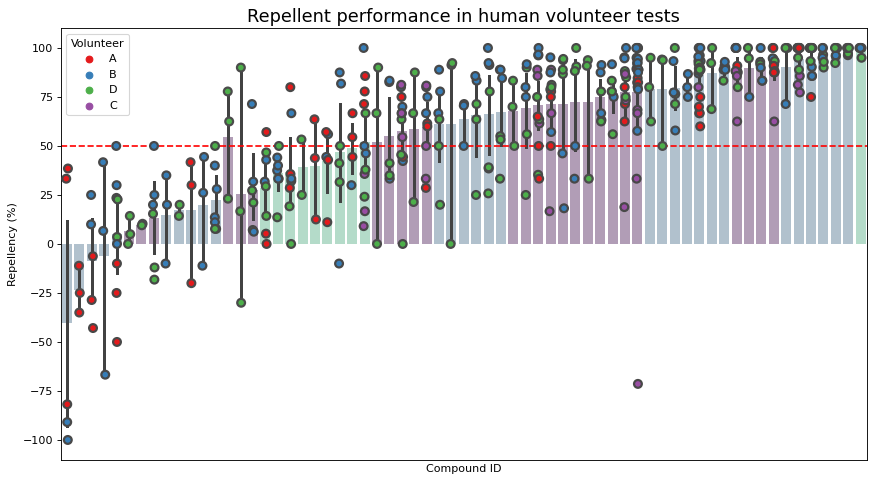

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of unique volunteers per compound
volunteer_counts = df.groupby('Compound')['Volunteer'].nunique().reset_index()
volunteer_counts.columns = ['Compound', 'Volunteer_Count']

# Merge the volunteer counts back into the main DataFrame
df = df.merge(volunteer_counts, on='Compound', how='left')

# Set up the color palette based on the unique counts of volunteers
cmap = sns.color_palette("viridis", as_cmap=True)
norm = plt.Normalize(df['Volunteer_Count'].min(), df['Volunteer_Count'].max())
colors = cmap(norm(df['Volunteer_Count']))

# Plot with colors representing volunteer count
plt.figure(figsize=(13,7), dpi=80)
sns.barplot(data=df, x="Compound", y="Repellency (%)", palette=colors, alpha=0.4)
sns.stripplot(data=df, x="Compound", y="Repellency (%)", size=7, alpha=1, palette="Set1", hue='Volunteer', linewidth=2)

# Hide x-axis labels for compound IDs
plt.xticks([], [])

plt.tick_params(axis='x', labelsize=10)
plt.title('Repellent performance in human volunteer tests').set_fontsize('16')
plt.xticks(rotation=60, ha='right')
plt.axhline(y=50, color='r', linestyle='--')
plt.xlabel('Compound ID')

# Add colorbar to represent volunteer count
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Number of Volunteers')

plt.show()